In [301]:
import numpy as np
import pandas as pd
from skimage.feature import hog
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


In [302]:
import glob

car=glob.glob('vehicles/**/*.png')
no_car=glob.glob('non-vehicles/**/*.png')

In [303]:
print('car len',len(car))
print('No car len',len(no_car))

car len 8792
No car len 8968


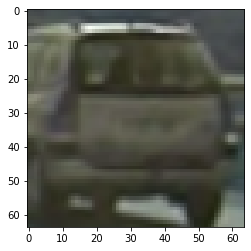

In [304]:
img_car=cv2.imread(car[0])
plt.imshow(img_car)

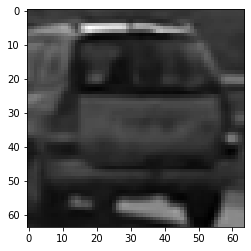

In [305]:
gray_img=cv2.cvtColor(img_car,cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img,cmap='gray')

In [306]:
features,hog_image=hog(gray_img,
                      orientations=11,
                      pixels_per_cell=(16,16),
                      cells_per_block=(2,2),
                       transform_sqrt=False,
                       visualize=True,
                       feature_vector=True,
                       #channel_axis=-1  # Adjust this parameter based on your image structure

                      )

features.shape

(396,)

In [307]:
features

array([0.18194312, 0.0836684 , 0.07620822, 0.16131465, 0.30557369,
       0.30784425, 0.15550879, 0.05929887, 0.06176337, 0.06945773,
       0.04284588, 0.05172826, 0.04774909, 0.04669724, 0.12686047,
       0.40231226, 0.40231226, 0.16906018, 0.11298391, 0.03468561,
       0.01599654, 0.00663328, 0.20720004, 0.19218084, 0.08015439,
       0.08175691, 0.092956  , 0.12154937, 0.04800983, 0.00602314,
       0.00308853, 0.02859241, 0.08187405, 0.07135876, 0.07422945,
       0.05201007, 0.02557054, 0.03605426, 0.40231226, 0.04005481,
       0.01928292, 0.03759516, 0.01843458, 0.0696574 , 0.04364643,
       0.04028895, 0.03940144, 0.10704026, 0.36116863, 0.39372483,
       0.14264684, 0.09533172, 0.02926646, 0.0134973 , 0.00559692,
       0.01381333, 0.00903008, 0.01532011, 0.06950404, 0.10556794,
       0.39372483, 0.38980907, 0.04500403, 0.05010236, 0.0227687 ,
       0.00928906, 0.06020993, 0.06263212, 0.0438842 , 0.0215755 ,
       0.03042127, 0.39372483, 0.0337968 , 0.01627023, 0.03172

In [308]:
hog_image.shape

(64, 64)

In [309]:
hog_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

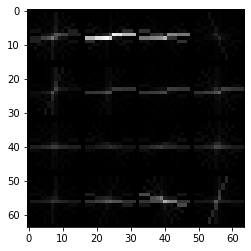

In [310]:
plt.imshow(hog_image,cmap='gray')

In [311]:
car_hog_accum=[]

for i in car:
    img_color=mpimg.imread(i)
    gray_img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    car_hog_features,car_hog_image=hog(gray_img,
                      orientations=11,
                      pixels_per_cell=(16,16),
                      cells_per_block=(2,2),
                       transform_sqrt=False,
                       visualize=True,
                       feature_vector=True,
                       #channel_axis=-1  # Adjust this parameter based on your image structure

                      )
    car_hog_accum.append(car_hog_features)
    

In [312]:
len(car_hog_accum)

8792

In [313]:
X_car=np.vstack(car_hog_accum).astype(np.float64)
y_car=np.ones(len(car_hog_accum))

In [314]:
X_car.shape  #the number of cars vs number of features

(8792, 396)

In [315]:
no_car_hog_accum=[]

for i in no_car:
    img_color=mpimg.imread(i)
    gray_img=cv2.cvtColor(img_color,cv2.COLOR_BGR2GRAY)
    no_car_hog_features,no_car_hog_image=hog(gray_img,
                      orientations=11,
                      pixels_per_cell=(16,16),
                      cells_per_block=(2,2),
                       transform_sqrt=False,
                       visualize=True,
                       feature_vector=True,
                       #channel_axis=-1  # Adjust this parameter based on your image structure

                      )
    no_car_hog_accum.append(no_car_hog_features)
    

In [316]:
X_no_car=np.vstack(no_car_hog_accum).astype(np.float64)
y_no_car=np.zeros(len(no_car_hog_accum))

In [317]:
X_no_car.shape  #the number of cars vs number of features

(8968, 396)

In [318]:
y_no_car.shape

(8968,)

In [319]:
y_no_car

array([0., 0., 0., ..., 0., 0., 0.])

In [320]:
# Example data (replace with your actual data)
X_car = np.array(X_car)
X_no_car = np.array(X_no_car)

# Vertically stack the arrays
X = np.vstack((X_car, X_no_car))
y = np.hstack((y_car, y_no_car))

In [321]:
X.shape

(17760, 396)

# Classfing using SVC

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

In [323]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# Initialize the SVM classifier
svm_classifier = LinearSVC()  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(X_test)

# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.96


<AxesSubplot:>

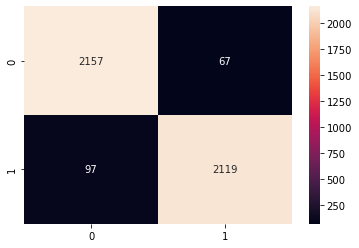

In [324]:
from sklearn.metrics import confusion_matrix, classification_report



# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix,annot=True,fmt="d")

In [325]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.97      0.96      2224
         1.0       0.97      0.96      0.96      2216

    accuracy                           0.96      4440
   macro avg       0.96      0.96      0.96      4440
weighted avg       0.96      0.96      0.96      4440



# Test the model

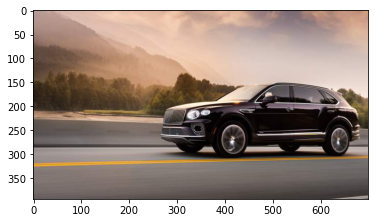

In [326]:
test_image=mpimg.imread('car.jpg')
plt.imshow(test_image,cmap='gray')

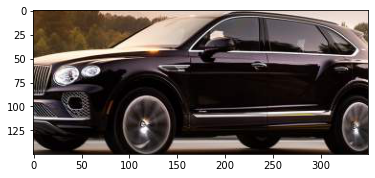

In [327]:
masked_region=test_image[150:300,300:650,:]
plt.imshow(masked_region,cmap='gray')
test_image=masked_region.astype(np.float32)/255

In [328]:
test_image.shape

(150, 350, 3)

(75, 175)


/var/folders/sj/kjrbr97x2w37jfp85085rwxc0000gn/T/ipykernel_2858/3242964391.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  masked_region_resized=cv2.resize(masked_region,(np.int(L),np.int(W)))


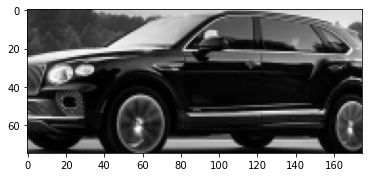

In [329]:
resizing_factor=2
masked_region_shape=masked_region.shape
L=masked_region_shape[1]/2
W=masked_region_shape[0]/2

masked_region_resized=cv2.resize(masked_region,(np.int(L),np.int(W)))



masked_region_resized_g=cv2.cvtColor(masked_region_resized,cv2.COLOR_BGR2GRAY)




print(masked_region_resized_g.shape)
plt.imshow(masked_region_resized_g,cmap='gray')

In [330]:
features,hog_image=hog(masked_region_resized_R,
                      orientations=11,
                      pixels_per_cell=(16,16),
                      cells_per_block=(2,2),
                       transform_sqrt=False,
                       visualize=True,
                       feature_vector=True,
                       #channel_axis=-1  # Adjust this parameter based on your image structure

                      )

features.shape

(1188,)

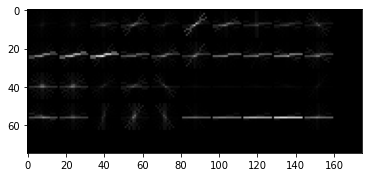

In [331]:
plt.imshow(hog_image,cmap='gray')

In [332]:
y_pred = svm_classifier.predict(selected_features)

In [333]:
y_pred

array([0.])